In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# Load and preprocess the dataset
df = pd.read_csv("D:\\UCD\\Research Paper\\Dataset M-En - Autencoder\\features_data1.csv")
df['Label'] = df['Label'].replace({0: 'Tr.B', 1: 'IoT.M', 2: 'IoT.M', 3: 'IoT.M', 4: 'IoT.B', 5: 'Tr.M'})

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Select subset of data
df1 = df[:10000]

In [4]:
# Replace values in the 'Label' column
df1['Label'] = df1['Label'].replace({
    'Tr.B': 'Normal',
    'Tr.M': 'Normal',
    'IoT.B': 'Attack',
    'IoT.M': 'Attack'
})

In [5]:
df1.columns

Index(['Protocol', 'TCP', 'UDP', 'TTL', 'ACK', 'SYN', 'FIN', 'PSH', 'URG',
       'RST', 'SequenceNumber', 'AcknowledgmentNumber', 'PacketSize',
       'PayloadSize', 'Label', 'PacketSizeStd', 'PacketCount',
       'MostFreqSrcPort', 'MostFreqDstPort', 'AvgPacketSize',
       'MostFreqPacketizeFreq', 'AbnormalSizeFreq', 'SeqNumVariance',
       'ShortLivedConnections', 'RepeatedAttempts', 'ScanningActivity',
       'FlowRate', 'SourceEntropy', 'ConnectionErrors', 'DstPortEntropy',
       'AvgPacketNumber', 'SYNFrequency', 'ACKFrequency', 'TCPFrequency',
       'UDPFrequency', 'MostFreqProtocol', 'PacketSizeVar',
       'MostFreqPayloadSize', 'AvgPayloadSize'],
      dtype='object')

In [6]:
from collections import Counter
Counter(df1['Label'])

Counter({'Normal': 5120, 'Attack': 4880})

In [7]:
from collections import Counter
Counter(df1['Protocol'])

Counter({6: 6258, 17: 3741, 89: 1})

In [8]:
# Replace values in the 'Label' column
df1['Protocol'] = df1['Protocol'].replace({
    6 : 'TCP',
    17: 'UDP',
    1 : 'UDP',
    89: 'UDP'
})

In [9]:
from collections import Counter
Counter(df1['Protocol'])

Counter({'TCP': 6258, 'UDP': 3742})

In [10]:
from collections import Counter
Counter(df1['MostFreqProtocol'])

Counter({6: 6251, 17: 3749})

In [11]:
# Replace values in the 'Label' column
df1['MostFreqProtocol'] = df1['MostFreqProtocol'].replace({
    6 : 'TCP',
    17: 'UDP',
    1 : 'UDP',
})

In [12]:
from collections import Counter
Counter(df1['MostFreqProtocol'])

Counter({'TCP': 6251, 'UDP': 3749})

In [61]:
import pandas as pd

# Example: Load your CSV or use existing DataFrame
# df = pd.read_csv("your_dataset.csv") 

# Define the function to format one sample into a text prompt
def format_sample(sample):
    """
    Converts a row of structured data into a readable text prompt for LLM input.
    """
    #label_text = "Attack" if sample["Label"] == 'Attack' else "Normal"

    return f"""
    Network Traffic Data:
    - Protocol: {sample['Protocol']}  # Corrected line
    - TCP: {sample['TCP']}
    - UDP: {sample['UDP']}
    - TTL: {sample['TTL']}
    - ACK Flag: {sample['ACK']}
    - SYN Flag: {sample['SYN']}
    - FIN Flag: {sample['FIN']}
    - PSH Flag: {sample['PSH']}
    - URG Flag: {sample['URG']}
    - RST Flag: {sample['RST']}
    - Sequence Number: {sample['SequenceNumber']}
    - Acknowledgment Number: {sample['AcknowledgmentNumber']}
    - Packet Size: {sample['PacketSize']}
    - Payload Size: {sample['PayloadSize']}
    - Packet Size Std Dev: {sample['PacketSizeStd']}
    - Packet Count: {sample['PacketCount']}
    - Most Frequent Source Port: {sample['MostFreqSrcPort']}
    - Most Frequent Destination Port: {sample['MostFreqDstPort']}
    - Average Packet Size: {sample['AvgPacketSize']}
    - Most Frequent Packet Size Freq: {sample['MostFreqPacketizeFreq']}
    - Abnormal Size Frequency: {sample['AbnormalSizeFreq']}
    - Sequence Number Variance: {sample['SeqNumVariance']}
    - Short-Lived Connections: {sample['ShortLivedConnections']}
    - Repeated Connection Attempts: {sample['RepeatedAttempts']}
    - Scanning Activity: {sample['ScanningActivity']}
    - Flow Rate: {sample['FlowRate']}
    - Source Entropy: {sample['SourceEntropy']}
    - Connection Errors: {sample['ConnectionErrors']}
    - Destination Port Entropy: {sample['DstPortEntropy']}
    - Avg Packet Number: {sample['AvgPacketNumber']}
    - SYN Frequency: {sample['SYNFrequency']}
    - ACK Frequency: {sample['ACKFrequency']}
    - TCP Frequency: {sample['TCPFrequency']}
    - UDP Frequency: {sample['UDPFrequency']}
    - Most Frequent Protocol: {sample['MostFreqProtocol']}
    - Packet Size Variance: {sample['PacketSizeVar']}
    - Most Frequent Payload Size: {sample['MostFreqPayloadSize']}
    - Average Payload Size: {sample['AvgPayloadSize']}

    Label: {sample['Label']}
    """
data=df1[:200]
# Apply the formatter to every row
formatted_samples = [format_sample(row) for _, row in data.iterrows()]

# Example: print the first formatted sample
print(formatted_samples[0])



    Network Traffic Data:
    - Protocol: UDP  # Corrected line
    - TCP: 0
    - UDP: 1
    - TTL: 64
    - ACK Flag: 0
    - SYN Flag: 0
    - FIN Flag: 0
    - PSH Flag: 0
    - URG Flag: 0
    - RST Flag: 0
    - Sequence Number: 0
    - Acknowledgment Number: 0
    - Packet Size: 558
    - Payload Size: 512
    - Packet Size Std Dev: 0.2022116623355307
    - Packet Count: 95864
    - Most Frequent Source Port: 24437
    - Most Frequent Destination Port: 9
    - Average Packet Size: 558.0014604022365
    - Most Frequent Packet Size Freq: 95859
    - Abnormal Size Frequency: 0
    - Sequence Number Variance: 0.0
    - Short-Lived Connections: 0
    - Repeated Connection Attempts: 95858
    - Scanning Activity: 0
    - Flow Rate: 106528.1021987034
    - Source Entropy: 1.5952660747023328
    - Connection Errors: 0
    - Destination Port Entropy: 0.0005664911649766
    - Avg Packet Number: 95864.0
    - SYN Frequency: 0.0
    - ACK Frequency: 0.0
    - TCP Frequency: 0.0
    - UDP F

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

# Create vector embeddings from the formatted samples
embeddings = model.encode(formatted_samples, show_progress_bar=True)


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [18]:
from transformers import AutoTokenizer, AutoModel

# Load the underlying tokenizer and transformer model for details
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")
hf_model = AutoModel.from_pretrained("sentence-transformers/all-mpnet-base-v2")

# 1. Print tokenizer vocabulary size
print(f"Tokenizer Vocabulary Size: {tokenizer.vocab_size}")

# 2. Show example tokenization and token IDs
example_sentence = formatted_samples[0] if len(formatted_samples) > 0 else "This is a test sentence."
tokens = tokenizer.tokenize(example_sentence)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
#print(f"\nExample sentence: {example_sentence}")
#print(f"Tokenized: {tokens}")
#print(f"Token IDs: {token_ids}")

# 3. Show embedding dimensions
print(f"\nEmbedding shape (n_samples x embedding_dim): {embeddings.shape}")
print(f"Embedding dimension: {embeddings.shape[1]}")

# 4. Show model architecture and hidden size
print(f"\nModel architecture: {hf_model.config.architectures}")
print(f"Model hidden size (embedding dimension): {hf_model.config.hidden_size}")


Tokenizer Vocabulary Size: 30527

Embedding shape (n_samples x embedding_dim): (200, 768)
Embedding dimension: 768

Model architecture: ['MPNetForMaskedLM']
Model hidden size (embedding dimension): 768


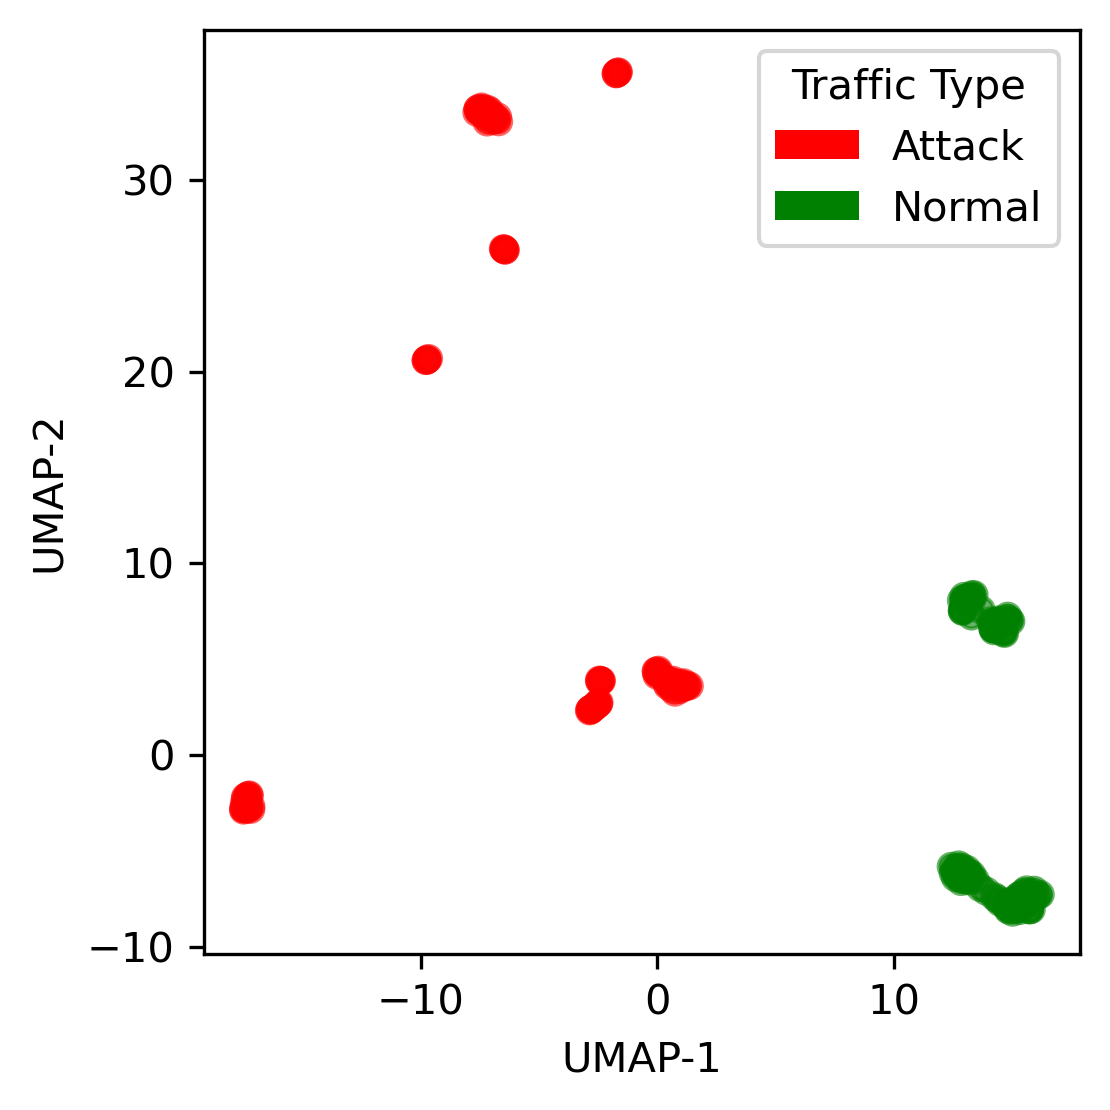

In [29]:
import umap
import matplotlib.pyplot as plt

# UMAP reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
embedding_umap = reducer.fit_transform(embeddings)

# Define colors
colors = ['red' if label == 'Attack' else 'green' for label in data['Label']]

# Plot
plt.figure(figsize=(3.5, 3.5),dpi=300)
scatter = plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=colors, alpha=0.6)

# Create custom legend handles
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='Attack'),
    Patch(facecolor='green', label='Normal')
]

# Add legend
plt.legend(handles=legend_elements, title='Traffic Type', loc='upper right')

# Labels and title
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout(pad=0)
plt.savefig('all-mpnet-base-v2.jpg')


In [49]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
import umap
import plotly.express as px
import pandas as pd

# Step 1: Load the embedding model
model = SentenceTransformer('all-mpnet-base-v2')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Step 2: Tokenize one of the samples
sample_text = formatted_samples[0]
tokens = tokenizer.tokenize(sample_text)

# Step 3: Get embeddings for each token
embeddings = model.encode(tokens)

# Step 4: Reduce dimensionality using UMAP
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
embedding_umap = reducer.fit_transform(embeddings)

# Step 5: Create a DataFrame for visualization
df_vis = pd.DataFrame(embedding_umap, columns=["UMAP-1", "UMAP-2"])
df_vis["word"] = tokens

# Step 6: Interactive plot using Plotly
fig = px.scatter(df_vis, x="UMAP-1", y="UMAP-2", text="word")
fig.update_traces(textposition='top center', marker=dict(color='blue', size=12))
fig.update_layout(height=400, width=400)
fig.show()


In [36]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
import umap
import pandas as pd
import plotly.express as px
import numpy as np

# Load model and tokenizer
model = SentenceTransformer('all-mpnet-base-v2')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize one sample
sample_text = formatted_samples[0]
tokens = tokenizer.tokenize(sample_text)

# Create embeddings
embeddings = model.encode(tokens)

# Reduce dimensions
reducer = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42)
embedding_umap = reducer.fit_transform(embeddings)

# Jitter to avoid overlapping points
embedding_umap += np.random.normal(scale=0.05, size=embedding_umap.shape)

# Create DataFrame
df_vis = pd.DataFrame(embedding_umap, columns=["UMAP-1", "UMAP-2"])
df_vis["word"] = tokens

# Plot using Plotly (with hover text only to reduce clutter)
fig = px.scatter(df_vis, x="UMAP-1", y="UMAP-2", color_discrete_sequence=["blue"],
                 hover_data={"word": True, "UMAP-1": False, "UMAP-2": False},
                 title="UMAP Projection of Token Embeddings")

fig.update_traces(marker=dict(size=10, opacity=0.7),
                  hovertemplate="<b>%{customdata[0]}</b><extra></extra>")

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()


In [ ]:
import faiss
import numpy as np

embedding_matrix = np.array(embeddings).astype('float32')

# Create index
index = faiss.IndexFlatL2(embedding_matrix.shape[1])
index.add(embedding_matrix)


In [ ]:
import faiss
import numpy as np

embedding_matrix = np.array(embeddings).astype('float32')

# Create index
index = faiss.IndexFlatL2(embedding_matrix.shape[1])
index.add(embedding_matrix)

def create_rag_prompt(sample, k=5):
    query_text = format_sample(sample)
    query_vec = model.encode([query_text]).astype('float32')

    # Find top-k similar samples
    D, I = index.search(query_vec, k)
    context = "\n".join([formatted_samples[i] for i in I[0]])

    # Final prompt
    return f"""Here are examples of network traffic:\n\n{context}\n\nNow classify the following sample:\n{query_text}\n\nAnswer only as: "Attack" or "Normal".""" 


In [90]:
row= df1[5000:5050]

row[:2]

Protocol  TCP  UDP  TTL  ACK  SYN  FIN  PSH  URG  RST  ...  \
5000      TCP    1    0   64    1    0    0    0    0    0  ...   
5001      UDP    0    1   55    0    0    0    0    0    0  ...   

      DstPortEntropy  AvgPacketNumber  SYNFrequency  ACKFrequency  \
5000        0.708569           7332.0           2.0        7331.0   
5001       10.049040          65058.0          24.0         125.0   

     TCPFrequency  UDPFrequency  MostFreqProtocol  PacketSizeVar  \
5000     1.000000      0.000000               TCP  454090.965695   
5001     0.002106      0.997863               UDP    1045.785717   

      MostFreqPayloadSize  AvgPayloadSize  
5000                 1448      986.434397  
5001                  516      515.276891  

[2 rows x 39 columns]

In [ ]:
pred=[]
for i in range(len(row)):
    response = ollama.chat(
        model="mistral",
        messages=[{"role": "user", "content": create_rag_prompt(row.iloc[i])}]
    )
    prediction = response['message']['content']
    pred.append(prediction)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [122]:
import re


extracted_labels = []
for item in pred:
    # Use regular expression to find "Attack" or "Normal" (case-insensitive)
    match = re.search(r'"?(Attack|Normal)"?', item, re.IGNORECASE)
    if match:
        extracted_labels.append(match.group(1).capitalize())  # Capitalize for consistency

print(extracted_labels)

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack', 'Normal', 'Normal', 'Normal', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Normal', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Attack', 'Normal', 'Attack', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack']


In [123]:
len(extracted_labels)

50

In [124]:
from sklearn.metrics import accuracy_score
a=accuracy_score(row['Label'][:50],extracted_labels)
a

0.98

In [125]:
from sklearn.metrics import accuracy_score
a=confusion_matrix(row['Label'][:50],extracted_labels)
a

array([[21,  0],
       [ 1, 28]], dtype=int64)

In [117]:
pred=[]
for i in range(len(row)):
    response = ollama.chat(
        model="deepseek-r1:7b",
        messages=[{"role": "user", "content": create_rag_prompt(row.iloc[i])}]
    )
    prediction = response['message']['content']
    pred.append(prediction)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [118]:
import re

extracted_labels = []
for item in pred:
    # Use regular expression to find "Attack" or "Normal" (case-insensitive)
    match = re.search(r'"?(Attack|Normal)"?', item, re.IGNORECASE)
    if match:
        extracted_labels.append(match.group(1).capitalize())  # Capitalize for consistency

print(extracted_labels)

['Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack']


In [119]:
from sklearn.metrics import accuracy_score
a=accuracy_score(row['Label'][:50],extracted_labels)
a

0.42

In [120]:
from sklearn.metrics import accuracy_score
a=confusion_matrix(row['Label'][:50],extracted_labels)
a

array([[21,  0],
       [29,  0]], dtype=int64)

In [107]:
pred=[]
for i in range(len(row)):
    response = ollama.chat(
        model="phi",
        messages=[{"role": "user", "content": create_rag_prompt(row.iloc[i])}]
    )
    prediction = response['message']['content']
    pred.append(prediction)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [112]:
import re


extracted_labels = []
for item in pred:
    # Use regular expression to find "Attack" or "Normal" (case-insensitive)
    match = re.search(r'"?(Attack|Normal)"?', item, re.IGNORECASE)
    if match:
        extracted_labels.append(match.group(1).capitalize())  # Capitalize for consistency
    else:
        extracted_labels.append('Normal')

print(extracted_labels)

['Attack', 'Normal', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack', 'Attack']


In [113]:
len(extracted_labels)

50

In [114]:
from sklearn.metrics import accuracy_score
a=accuracy_score(row['Label'][:50],extracted_labels)
a

0.64

In [111]:
from sklearn.metrics import accuracy_score
a=confusion_matrix(row['Label'][:50],extracted_labels)
a

array([[19,  2],
       [16, 13]], dtype=int64)

In [102]:
pred=[]
for i in range(len(row)):
    response = ollama.chat(
        model="gemma3:4b",
        messages=[{"role": "user", "content": create_rag_prompt(row.iloc[i])}]
    )
    prediction = response['message']['content']
    pred.append(prediction)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [103]:
import re


extracted_labels = []
for item in pred:
    # Use regular expression to find "Attack" or "Normal" (case-insensitive)
    match = re.search(r'"?(Attack|Normal)"?', item, re.IGNORECASE)
    if match:
        extracted_labels.append(match.group(1).capitalize())  # Capitalize for consistency
    else:
        extracted_labels.append('Normal')

print(extracted_labels)

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack', 'Normal', 'Normal', 'Normal', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Normal', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack', 'Attack', 'Normal', 'Attack', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Attack', 'Normal', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack']


In [105]:
from sklearn.metrics import accuracy_score
a=accuracy_score(row['Label'][:50],extracted_labels)
a

1.0

In [106]:
from sklearn.metrics import accuracy_score
a=confusion_matrix(row['Label'][:50],extracted_labels)
a

array([[21,  0],
       [ 0, 29]], dtype=int64)

In [95]:
pred=[]
for i in range(len(row)):
    response = ollama.chat(
        model="llama3",
        messages=[{"role": "user", "content": create_rag_prompt(row.iloc[i])}]
    )
    prediction = response['message']['content']
    pred.append(prediction)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [99]:
import re


extracted_labels = []
for item in pred:
    # Use regular expression to find "Attack" or "Normal" (case-insensitive)
    match = re.search(r'"?(Attack|Normal)"?', item, re.IGNORECASE)
    if match:
        extracted_labels.append(match.group(1).capitalize())  # Capitalize for consistency
    else:
        extracted_labels.append('Normal')

print(extracted_labels)

['Normal', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Normal', 'Normal', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack']


In [100]:
from sklearn.metrics import accuracy_score
a=accuracy_score(row['Label'][:50],extracted_labels)
a

0.54

In [101]:
from sklearn.metrics import accuracy_score
a=confusion_matrix(row['Label'][:50],extracted_labels)
a

array([[20,  1],
       [22,  7]], dtype=int64)

In [91]:
pred=[]
for i in range(len(row)):
    response = ollama.chat(
        model="llama3.2",
        messages=[{"role": "user", "content": create_rag_prompt(row.iloc[i])}]
    )
    prediction = response['message']['content']
    pred.append(prediction)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [92]:
import re


extracted_labels = []
for item in pred:
    # Use regular expression to find "Attack" or "Normal" (case-insensitive)
    match = re.search(r'"?(Attack|Normal)"?', item, re.IGNORECASE)
    if match:
        extracted_labels.append(match.group(1).capitalize())  # Capitalize for consistency
    else:
        extracted_labels.append('Normal')

print(extracted_labels)

['Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Attack', 'Normal', 'Attack', 'Attack', 'Attack']


In [93]:
from sklearn.metrics import accuracy_score
a=accuracy_score(row['Label'][:50],extracted_labels)
a

0.44

In [94]:
from sklearn.metrics import accuracy_score
a=confusion_matrix(row['Label'][:50],extracted_labels)
a

array([[21,  0],
       [28,  1]], dtype=int64)